<a href="https://colab.research.google.com/github/leticiaram/Modelacion-Epidemiologica/blob/main/10_ABC_Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paquetes

In [1]:
!pip install EoN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.2-py3-none-any.whl size=122467 sha256=0d5091df02cf970045076e5fa0db6b2ba40fddde80ff5ff939bae1e5baaa49ab
  Stored in directory: /root/.cache/pip/wheels/5c/f5/1a/a0eb87d5be57c62526fbd133651c442482ea5a997d88382007
Successfully built EoN


In [2]:
!pip install ipdb  #para poder hacer debugging
# https://www.geeksforgeeks.org/debugging-in-google-colab/

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.0 MB/s eta 0:00:00


In [3]:
import EoN

import networkx as nx
from matplotlib import rc
import matplotlib.pylab as plt

#import scipy
#import random
import numpy as np

import collections
import scipy.stats as stats
import ipdb

# Obtenemos datos sintéticos

In [6]:
N = 20000      # nodos
target_k = 7

# Red Poisson
np.random.seed(20)
k_pois = np.random.poisson(target_k, N)
print(sum(k_pois.tolist()))
G_Poisson = nx.configuration_model(k_pois.tolist())

139890


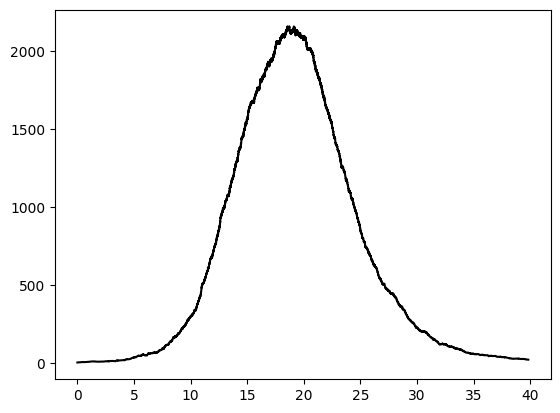

In [14]:
tau = 0.15        # tasa de transmisión
gamma = 0.5      # tasa de recuperación
rho = 0.0001      # fracción aleatoria de casos infectados iniciales

S0 = N*(1-rho)
I0 = rho*N
R0 = 0.

tmax = 40
np.random.seed(24)
t, S, I, R = EoN.fast_SIR(G_Poisson, tau, gamma, rho=rho, tmax = tmax)

plt.plot(t, I, color = 'k', alpha=1, label='Simulation')

## Incidencia diaria

In [15]:
Ycum = N - S

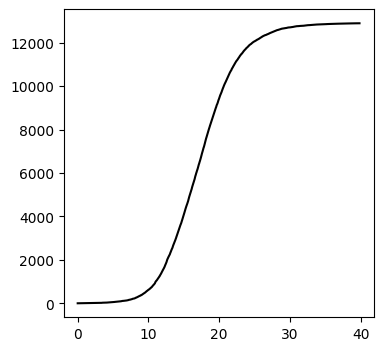

In [16]:
plt.figure(figsize=(4,4))
plt.plot(t, Ycum, color = 'k', alpha=1, label='Simulation')

In [17]:
Ycum[0]

2

In [18]:
import pandas as pd
#Ejemplo de como usar pd.cut
sim = {'time': np.array([0, 0.5, 1.2, 1.8, 2.3, 3.4, 3.5]), 'Y': np.array([0, 1, 2, 3, 4, 5])}
grupos = np.array([0, 1, 2, 3, 4, 5, 6])
cut_labels, cut_bins = pd.cut( sim['time'], bins=grupos, include_lowest=True, retbins=True, labels=False)
print(cut_labels)
print(cut_bins)
sim['Y'][cut_labels]

[0 0 1 1 2 3 3]
[0 1 2 3 4 5 6]


array([0, 0, 1, 1, 2, 3, 3])

In [19]:
import pandas as pd
dias = np.arange(round(tmax)+1)
cut_labels, cut_bins = pd.cut(t, bins=dias, include_lowest=True, retbins=True, labels=False)

# Obtener el valor más grande de Y en cada día
# Crear un DataFrame temporal
temp_df = pd.DataFrame({
  'bin': cut_labels,
  'value':  np.arange(len(cut_labels))
})
index = temp_df.groupby('bin').max()['value'].values
print("index = ", index)

Y_cum_diaria = Ycum[index]
print("Y_cum_diaria = ", Y_cum_diaria)

index =  [    6    13    26    46    76   134   205   329   565   947  1472  2296
  3469  4928  6572  8532 10568 12716 14838 16810 18605 20190 21464 22481
 23266 23854 24308 24684 24978 25178 25333 25439 25518 25594 25642 25676
 25703 25728 25750 25760]
Y_cum_diaria =  [    7    11    20    32    56    92   137   223   379   623   982  1506
  2236  3104  4066  5141  6244  7401  8482  9449 10257 10913 11416 11791
 12059 12257 12407 12557 12650 12703 12758 12780 12812 12838 12851 12863
 12873 12881 12889 12891]


In [20]:
print("dias=",dias)
print("max t=",max(t))
print("t=",t)
print("cut_labels=",cut_labels)
print(len(Y_cum_diaria))

dias= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
max t= 39.83327385891988
t= [ 0.          0.20606012  0.3207616  ... 39.65767348 39.70005262
 39.83327386]
cut_labels= [ 0  0  0 ... 39 39 39]
40


In [21]:
Y_cum_diaria_0 = np.concatenate([np.atleast_1d(I0),Y_cum_diaria])
Y_cum_diaria_0

array([2.0000e+00, 7.0000e+00, 1.1000e+01, 2.0000e+01, 3.2000e+01,
       5.6000e+01, 9.2000e+01, 1.3700e+02, 2.2300e+02, 3.7900e+02,
       6.2300e+02, 9.8200e+02, 1.5060e+03, 2.2360e+03, 3.1040e+03,
       4.0660e+03, 5.1410e+03, 6.2440e+03, 7.4010e+03, 8.4820e+03,
       9.4490e+03, 1.0257e+04, 1.0913e+04, 1.1416e+04, 1.1791e+04,
       1.2059e+04, 1.2257e+04, 1.2407e+04, 1.2557e+04, 1.2650e+04,
       1.2703e+04, 1.2758e+04, 1.2780e+04, 1.2812e+04, 1.2838e+04,
       1.2851e+04, 1.2863e+04, 1.2873e+04, 1.2881e+04, 1.2889e+04,
       1.2891e+04])

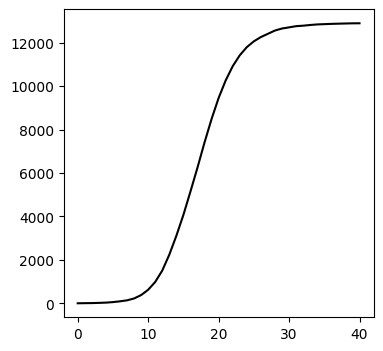

In [22]:
plt.figure(figsize=(4,4))
plt.plot(Y_cum_diaria_0, color = 'k', alpha=1, label='Simulation')

In [23]:
Y_diaria = np.diff(Y_cum_diaria_0)
Y_diaria

array([   5.,    4.,    9.,   12.,   24.,   36.,   45.,   86.,  156.,
        244.,  359.,  524.,  730.,  868.,  962., 1075., 1103., 1157.,
       1081.,  967.,  808.,  656.,  503.,  375.,  268.,  198.,  150.,
        150.,   93.,   53.,   55.,   22.,   32.,   26.,   13.,   12.,
         10.,    8.,    8.,    2.])

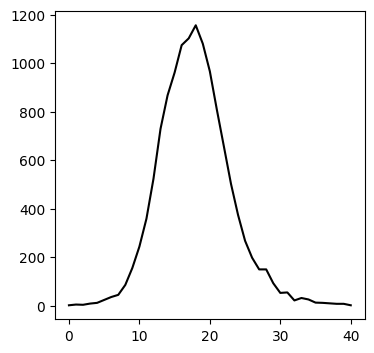

In [24]:
Y_diaria_0 = np.concatenate([np.atleast_1d(I0),Y_diaria])
plt.figure(figsize=(4,4))
plt.plot(Y_diaria_0 , color = 'k', alpha=1, label='Simulation')

In [25]:
if len(Y_diaria_0) < len(dias):
    dat = np.pad(Y_diaria_0, (0, len(dias) - len(Y_diaria_0)), 'constant')
else:
    dat = Y_diaria_0[:len(dias)]

print(dat)

[   2.    5.    4.    9.   12.   24.   36.   45.   86.  156.  244.  359.
  524.  730.  868.  962. 1075. 1103. 1157. 1081.  967.  808.  656.  503.
  375.  268.  198.  150.  150.   93.   53.   55.   22.   32.   26.   13.
   12.   10.    8.    8.    2.]


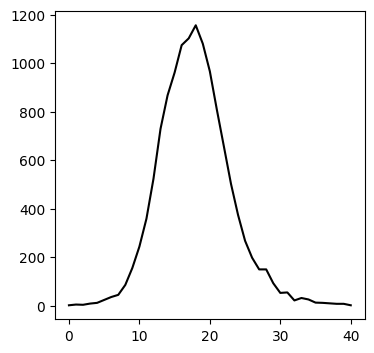

In [26]:
plt.figure(figsize=(4,4))
plt.plot(dias, dat, color = 'k', alpha=1, label='Incidencia diaria simulada')

In [27]:
from google.colab import drive
drive.mount('/content/drive/')
import joblib
joblib.dump(dias,'/content/drive/MyDrive/Colab Notebooks/dias.joblib')
joblib.dump(dat,'/content/drive/MyDrive/Colab Notebooks/dat.joblib')

# Para cargar
#b = joblib.load('/content/drive/MyDrive/Colab Notebooks/b.joblib')
#g = joblib.load('/content/drive/MyDrive/Colab Notebooks/g.joblib')

Mounted at /content/drive/


['/content/drive/MyDrive/Colab Notebooks/dat.joblib']

https://github.com/Neojume/pythonABC/blob/master/algorithms.py

https://bayesiancomputationbook.com/markdown/chp_08.html

https://colab.research.google.com/github/astroML/astroML-notebooks/blob/main/chapter5/astroml_chapter5_Approximate_Bayesian_Computation.ipynb#scrollTo=O5BfwUFdYIk5

# ABC Funciones

In [105]:
def epanechnikov(u):
    return 0.75 * (1 - np.square(np.clip(u, -1, 1)))
def gaussian(u):
    # sigma = 1
    return np.exp(-0.5 * np.square(u)) / np.sqrt(2 * np.pi)


def log_KH(Isim, Iobs, f=1.2, epsilon=0.01):
    # f  factor para el ancho de banda del Kernel para medir dist entre rep obs y rep sim
    # epsilon es el termino que permite definir la función de distancia relativa en todos casos
    Iobs = np.array(Iobs, dtype=float)
    Iobs[Iobs == 0] = epsilon * np.max(Iobs)

    Isim = np.array(Isim, dtype=float)
    Isim[Isim == 0] = epsilon * np.max(Isim)

    h = f * len(Iobs)
    t_xy = (np.sqrt(np.nansum((Iobs - Isim) ** 2 / Iobs)) + np.sqrt(np.nansum((Iobs - Isim) ** 2 / Isim)))/2
    #t_xy = np.sqrt(np.nansum((Iobs - Isim) ** 2 ))
    #t_xy = np.nansum(np.abs(Iobs - Isim))/len(Iobs)
    return -0.5 * np.square(t_xy )/ (2*np.square(h)) - 1/2*np.log(2*np.pi)  # kernel gaussiano con sigma = 1

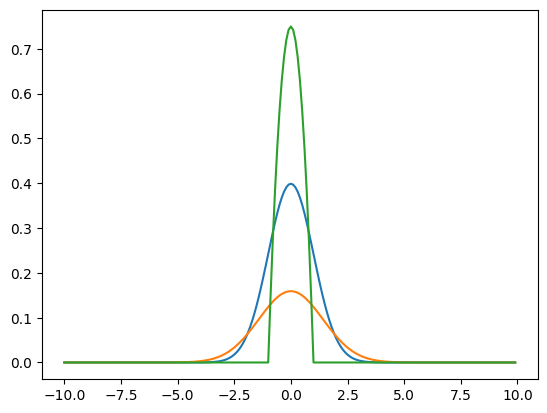

In [29]:
xx = np.arange(-10,10,0.1)
plt.plot(xx,gaussian(xx))
plt.plot(xx, np.exp(-0.5 * np.square(xx)/ (2*np.square(1)) - np.log(2*np.pi)))
plt.plot(xx,epanechnikov(xx))
plt.show()

In [23]:
# Ejemplo
Isim = [1, 2, 3, 4]
Iobs = [0, 2, 0, 4]
f = 1.5
resultado = log_KH(Isim, Iobs, f)
print(resultado)

-1.8445465108537897


In [30]:
def q_mov(theta0, sd1=0.001, sd2=0.05):
  x = np.random.binomial(1, 0.5)  # Indicadora para la mezcla
  theta1=[-1,0]
  while (theta1[0] < 0 or theta1[1] <0 ):
    theta1 = [
      x * np.random.normal(theta0[0], sd1) + (1 - x) * np.random.normal(theta0[0], sd2),
      x * np.random.normal(theta0[1], sd1) + (1 - x) * np.random.normal(theta0[1], sd2)
    ]
  return theta1


In [31]:
 # Ejemplo
 q_mov([0.01, 0.02])

[0.00938310034843833, 0.019058813432570872]

In [32]:
def logaprioris(params0, tasas_exp):
    # tasas_exp indica los parametros para beta y gamma
    logap = np.sum([np.log(tasas_exp[0])- tasas_exp[0] * params0[0],
        np.log(tasas_exp[1])- tasas_exp[1] * params0[1]])
    return logap

# Ejemplo
params0 = [1.0, 2.0]
tasas_exp = [0.1, 0.2]
resultado = logaprioris(params0, tasas_exp)
print(resultado)


-4.412023005428146


In [33]:
def a_dias(t, I, S, N, dias):
  Ycum = N - S
 # print(len(Ycum))
  cut_labels, cut_bins = pd.cut(t, bins=dias, include_lowest=True, retbins=True, labels=False)

  # Obtener el valor más grande de Y en cada día
  temp_df = pd.DataFrame({
    'bin': cut_labels,
    'value':  np.arange(len(cut_labels))
  })
  index = temp_df.groupby('bin').max()['value'].values
  if (len(Ycum)<np.max(index)):
    ipdb.set_trace()

  Y_cum_diaria = Ycum[index]
  Y_cum_diaria_0 = np.concatenate([np.antleast_1d(I0),Y_cum_diaria])
  Y_diaria = p.diff(Y_cum_diaria_0)
  Y_diaria_0 = np.concatenate([np.atleast_1d(I0),Y_diaria])

  if len(Y_diaria_0) < len(dias):
    Y_diaria_0_p = np.pad(Y_diaria_0, (0, len(dias) - len(Y_diaria_0)), 'constant')
  else:
    Y_diaria_0_p = Y_diaria_0[:len(dias)]
  #ipdb.set_trace()
  return Y_diaria_0_p

In [35]:
print(tau, gamma)
print(dias)
print(len(dias))

0.15 0.5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
41


t= [0.         0.17363879 0.49333148]
[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
41


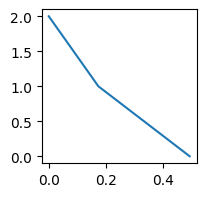

In [34]:
t, S, I, R = EoN.fast_SIR(G_Poisson, 0.15, 1.0, rho=rho, tmax = tmax)
plt.figure(figsize=(2,2))
plt.plot(t,I)
print("t=",t)

res = a_dias(t, I, S, N, dias)
print(res)
print(len(res))

In [72]:
def ABC(net, N, dat, dias, nsim, th_actual, tasas_exp, tmax ,rho=rho,  f=1.5, epsilon = 0.005):
  beta_v = [-1]*nsim
  gamma_v = [-1]*nsim
  alfa_v = [-1]*nsim
  acepta_v = [0]*nsim
  It = np.zeros((len(dias), nsim+1))

  tta, Sta, Ita, Rta = EoN.fast_SIR(net, th_actual[0], th_actual[1], rho=rho, tmax = tmax)
  Ita_diaria = a_dias(tta, Ita, Sta, N, dias)
  It[:,0] = Ita_diaria

  for i in range(nsim):
    if i % 100 ==0:
      print('iteración:', i)
    th_prop = q_mov(th_actual)
    ttp, Stp, Itp, Rtp = EoN.fast_SIR(net, th_prop[0], th_prop[1], rho=rho, tmax = tmax)
    Itp_diaria = a_dias(ttp, Itp, Stp, N, dias)
    It[:,i+1] = Itp_diaria

    #ipdb.set_trace()
    logalfa = logaprioris(th_prop, tasas_exp) + log_KH(Itp_diaria, dat, f=f, epsilon=epsilon) - logaprioris(th_actual, tasas_exp) - log_KH(Ita_diaria, dat, f=f, epsilon=epsilon)
    if logalfa > 0:
      alfa = 1
    else:
      alfa = np.exp(logalfa)
    alfa_v[i] = alfa

    if np.random.binomial(1, alfa) == 1:
      th_actual = th_prop
      Ita = Itp
      beta_v[i] = th_prop[0]
      gamma_v[i] = th_prop[1]
      acepta_v[i] = 1
    else:
      beta_v[i] = th_actual[0]
      gamma_v[i] = th_actual[1]
  return beta_v, gamma_v, alfa_v, acepta_v, It

In [69]:
It = np.zeros((len(dias), 10))
It[:,0]=range(len(dias))
It[:,0]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.])

# Run

In [108]:
f=0.05
b, g, a, acept, it= ABC(net=G_Poisson, N=N, dat=dat, dias=dias, nsim=5000, th_actual=[0.5,0.5], tasas_exp=[1,1], tmax = tmax, rho=rho,  f=f, epsilon = 0.01)

iteración: 0
iteración: 100
iteración: 200
iteración: 300
iteración: 400
iteración: 500
iteración: 600
iteración: 700
iteración: 800
iteración: 900
iteración: 1000
iteración: 1100
iteración: 1200
iteración: 1300
iteración: 1400
iteración: 1500
iteración: 1600
iteración: 1700
iteración: 1800
iteración: 1900
iteración: 2000
iteración: 2100
iteración: 2200
iteración: 2300
iteración: 2400
iteración: 2500
iteración: 2600
iteración: 2700
iteración: 2800
iteración: 2900
iteración: 3000
iteración: 3100
iteración: 3200
iteración: 3300
iteración: 3400
iteración: 3500
iteración: 3600
iteración: 3700
iteración: 3800
iteración: 3900
iteración: 4000
iteración: 4100
iteración: 4200
iteración: 4300
iteración: 4400
iteración: 4500
iteración: 4600
iteración: 4700
iteración: 4800
iteración: 4900


In [37]:
from google.colab import drive
drive.mount('/content/drive/')
import joblib
joblib.dump(b,'/content/drive/MyDrive/Colab Notebooks/b.joblib')
joblib.dump(g,'/content/drive/MyDrive/Colab Notebooks/g.joblib')
joblib.dump(a,'/content/drive/MyDrive/Colab Notebooks/a.joblib')
joblib.dump(acept,'/content/drive/MyDrive/Colab Notebooks/acept.joblib')
joblib.dump(it,'/content/drive/MyDrive/Colab Notebooks/it.joblib')

# Para cargar
#b = joblib.load('/content/drive/MyDrive/Colab Notebooks/b.joblib')
#g = joblib.load('/content/drive/MyDrive/Colab Notebooks/g.joblib')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['/content/drive/MyDrive/Colab Notebooks/acept.joblib']

0.8756


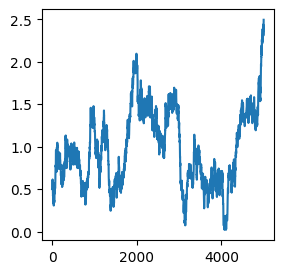

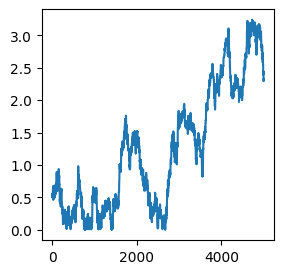

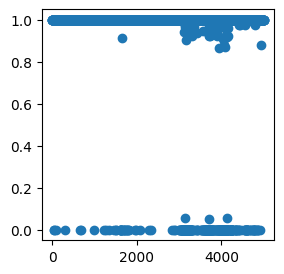

In [109]:
plt.figure(figsize=(3,3))
plt.plot(b)
plt.figure(figsize=(3,3))
plt.plot(g)
plt.figure(figsize=(3,3))
plt.plot(a,'o')
print(np.sum(acept)/len(acept))

In [80]:
print(len(dias))
It.shape

41


(41, 10)

1
1


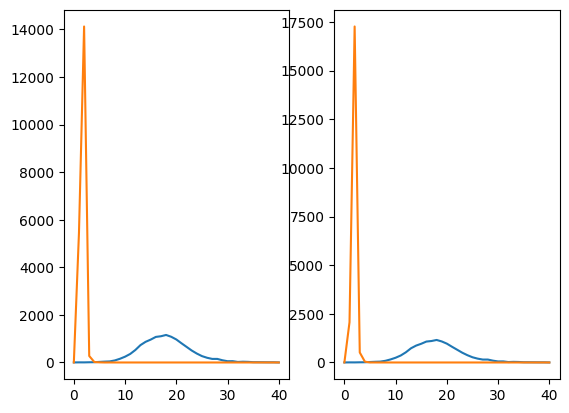

In [114]:
j = 950
print(a[j])
print(acept[j])
plt.subplot(1, 2, 1)
plt.plot(dias,dat)
plt.plot(dias, it[:,j-1])
plt.subplot(1, 2, 2)
plt.plot(dias,dat)
plt.plot(dias, it[:,j])

In [113]:
logalfa = logaprioris([b[j],g[j]], [1,1]) + log_KH(it[:,j], dat, f=f, epsilon=0.01) - logaprioris([b[j-1],g[j-1]], [1,1]) - log_KH(it[:,j-1], dat, f=f, epsilon=0.01)
print(logalfa)
print(np.exp(logalfa))

print(logaprioris([b[j],g[j]], [1,1]) )
print(log_KH(it[:,j], dat, f=f, epsilon=0.01))

print(logaprioris([b[j-1],g[j-1]], [1,1]) )
print(log_KH(it[:,j-1], dat, f=f, epsilon=0.01))



-15481.810825605178
0.0
-4.925542898434628
-649587.8354829588
-4.926761709713334
-634106.0234385424


In [93]:
log_KH([0]*len(dias), dat, f=f, epsilon=0.01)

-5882.656566261991

In [95]:
logalfa = logaprioris([b[j],g[j]], [1,1]) + log_KH(it[:,j], dat, f=f, epsilon=0.01) - logaprioris([b[j-1],g[j-1]], [1,1]) - log_KH(it[:,j-1], dat, f=f, epsilon=0.01)
print(logalfa)
print(np.exp(logalfa))

print(logaprioris([b[j],g[j]], [1,1]) )
print(log_KH(it[:,j], dat, f=f, epsilon=0.01))

print(logaprioris([b[j-1],g[j-1]], [1,1]) )
print(log_KH(it[:,j-1], dat, f=f, epsilon=0.01))

118096.80586032967
inf
-0.9862447846901345
-768.5838615994252
-0.9873879035395301
-118865.38857881025


<ipython-input-95-791f494247fd>:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(logalfa))


In [96]:
log_KH([0]*len(dias), dat, f=f, epsilon=0.01)

-768.7028383989492

In [104]:
itj1= it[:,j-1]
itj1[itj1==0]=0.01*np.max(it[:,j-1])
itj= it[:,j]
itj[itj==0]=0.01*np.max(it[:,j])

print((np.sqrt(np.nansum((dat - it[:,j-1]) ** 2 / dat))+np.sqrt(np.nansum((dat - it[:,j-1]) ** 2 /itj1))/2 ))
print((np.sqrt(np.nansum((dat - it[:,j]) ** 2 / dat))+np.sqrt(np.nansum((dat - it[:,j-1]) ** 2 /itj))/2 ))

print(np.sqrt(np.nansum((dat - it[:,j-1]) ** 2 )))
print(np.sqrt(np.nansum((dat - it[:,j]) ** 2 )))

print(np.nansum(np.abs(dat - it[:,j-1]))/len(dat))
print(np.nansum(np.abs(dat - it[:,j]))/len(dat))

2139.6065508937168
31325.926550982433
8828.200971336119
3189.7879954630216
697.6904878048779
314.34634146341466


In [ ]:
print(np.nansum(np.abs(dat - it[:,j-1]))/len(dat))
print(np.nansum(np.abs(dat - it[:,j]))/len(dat))